In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Virat_Kohli.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Runs        132 non-null    int64  
 1   BF          132 non-null    int64  
 2   4s          132 non-null    int64  
 3   6s          132 non-null    int64  
 4   SR          132 non-null    float64
 5   Pos         132 non-null    float64
 6   Dismissal   132 non-null    object 
 7   Inns        132 non-null    int64  
 8   Opposition  132 non-null    object 
 9   Ground      132 non-null    object 
 10  Start Date  132 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 11.5+ KB


In [3]:
df.shape

(132, 11)

In [4]:
df.duplicated().sum()

0

# Q-2] Read Data

In [5]:
df.isnull().sum()

Runs          0
BF            0
4s            0
6s            0
SR            0
Pos           0
Dismissal     0
Inns          0
Opposition    0
Ground        0
Start Date    0
dtype: int64

# Q-3] The dataset contains matches...

In [6]:
df['Runs'].count()

132

In [7]:
print("Total run : ",df['Runs'].sum())

Total run :  6184


# Q-4] Find average of Virat Kohli during the same period

In [8]:
print("Average run : ",float(df['Runs'].mean()))

Average run :  46.84848484848485


# Q-5] look at the trend of runs scored by Virat Kohli

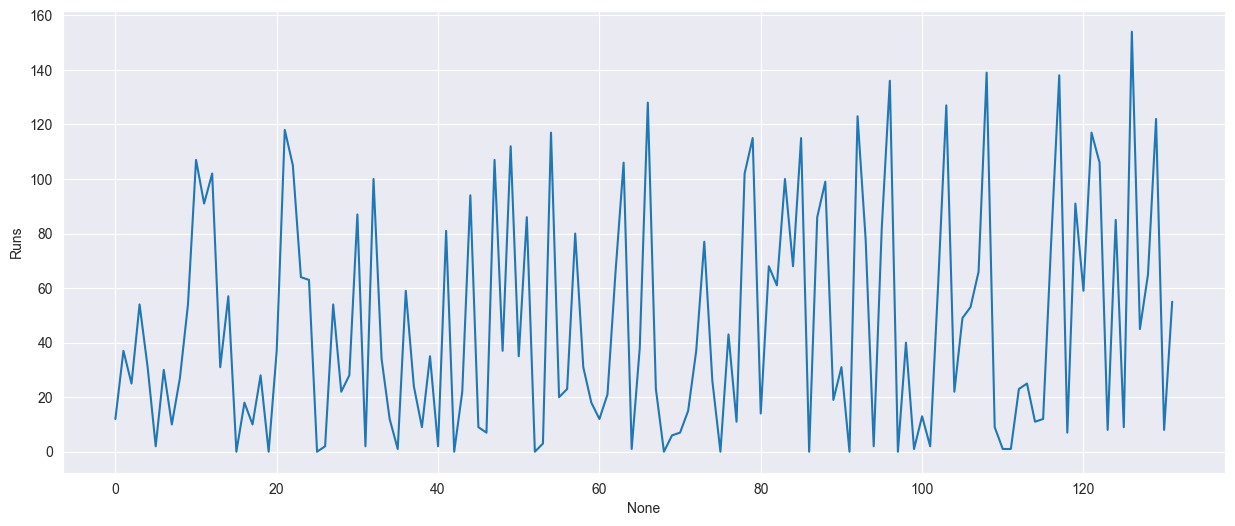

In [9]:
sns.set_style("darkgrid")
plt.figure(figsize=(15, 6))

sns.lineplot(x=df.index,y=df['Runs'])
plt.show()

# Q-6] Find all the batting positions played by Virat Kohli

In [10]:
new_d = df['Pos'].value_counts()
new_d.values

array([91, 28,  3,  3,  3,  3,  1], dtype=int64)

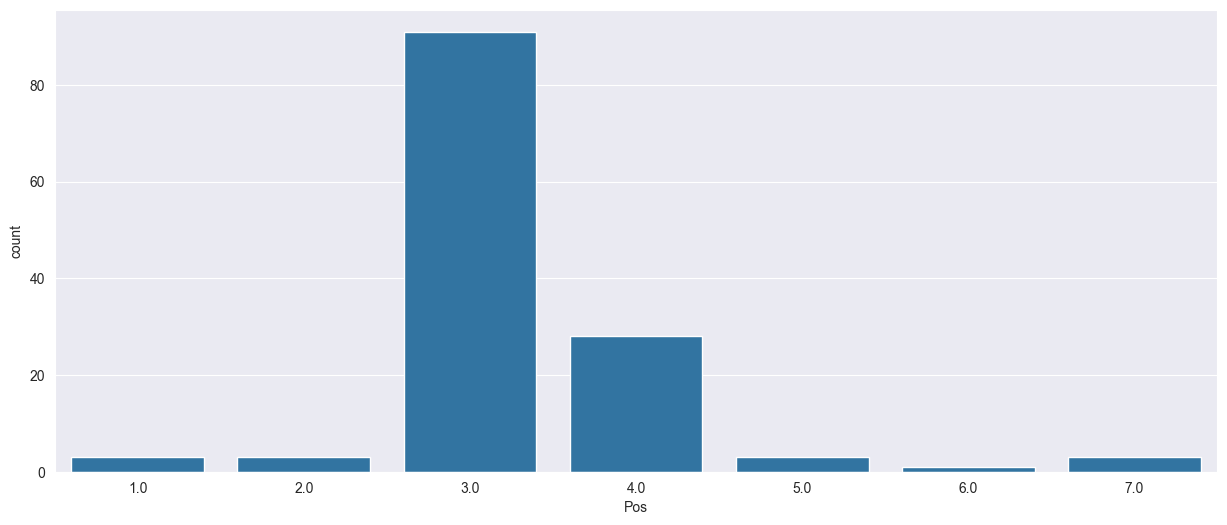

In [11]:
plt.figure(figsize=(15, 6))
sns.countplot(x=df['Pos'])
plt.show()

# Q-7] Create pie chart of above analyzed data

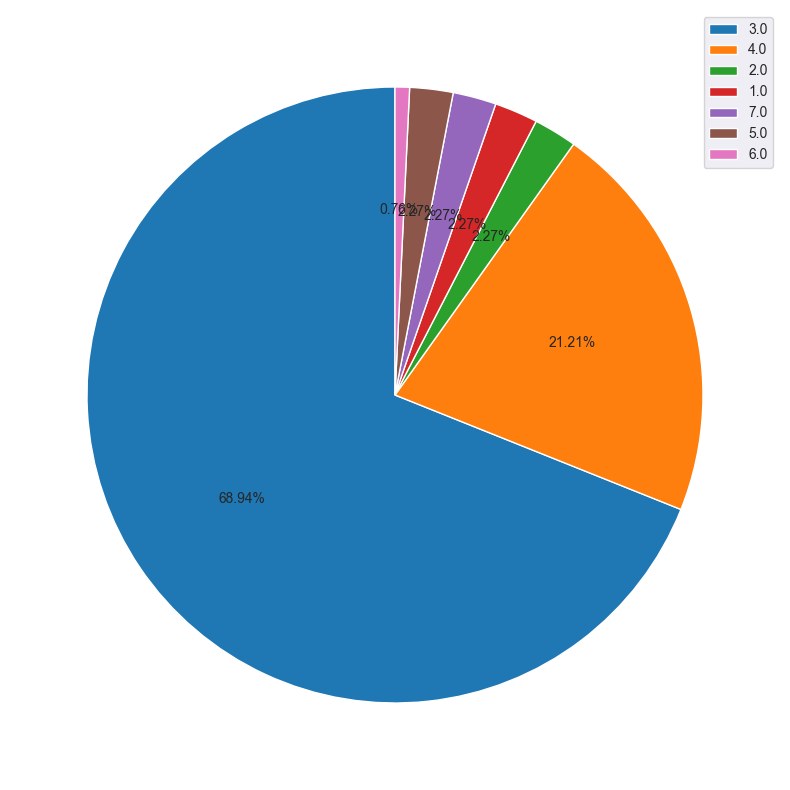

In [12]:
plt.figure(figsize=(10,10))
plt.pie(new_d.values,autopct='%1.2f%%',startangle=90)
plt.legend(new_d.index)
plt.show()

# Q-8] look at the total runs scored by Virat Kohli in different positions

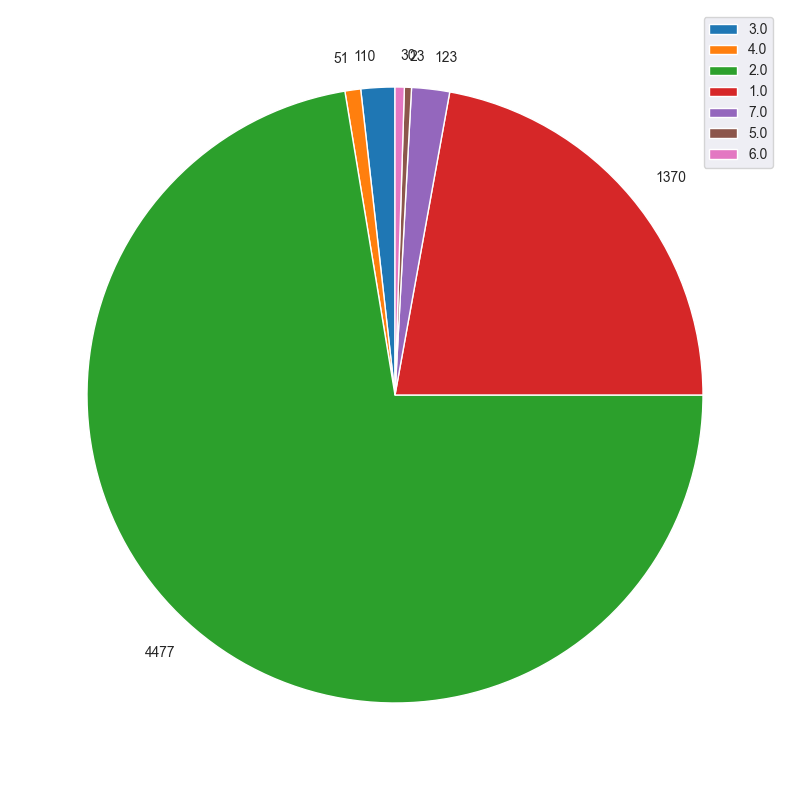

In [13]:
new_run = df.groupby('Pos')['Runs'].sum()
plt.figure(figsize=(10,10))
plt.pie(new_run,labels=new_run,startangle=90)
plt.legend(new_d.index)
plt.show()

# Q-9] find out the number of centuries scored

In [14]:
cent_df = df[df['Runs'] >= 100]

<Axes: xlabel='Inns', ylabel='count'>

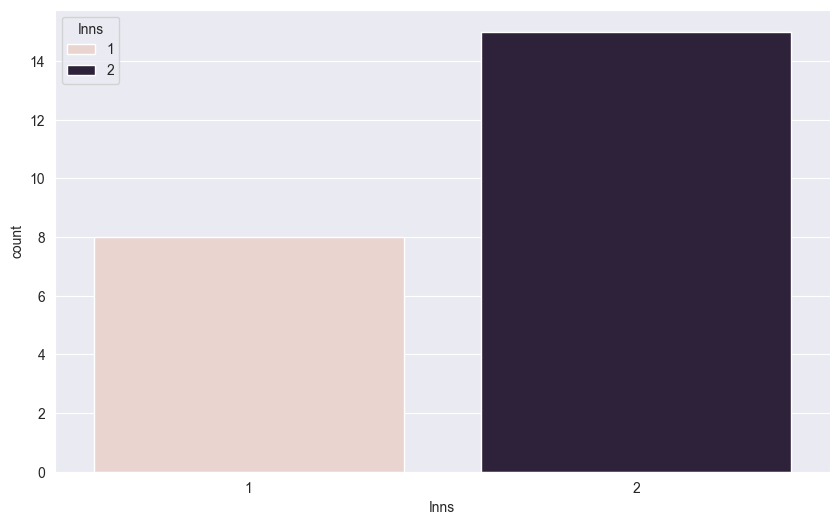

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x=cent_df['Inns'],hue=cent_df['Inns'])

# Q-10] Find the kind of dismissals Virat Kohli faced most of the time

In [16]:
dis = df['Dismissal'].value_counts()
dis

Dismissal
caught        84
not out       17
run out       10
bowled        10
lbw            9
stumped        1
hit wicket     1
Name: count, dtype: int64

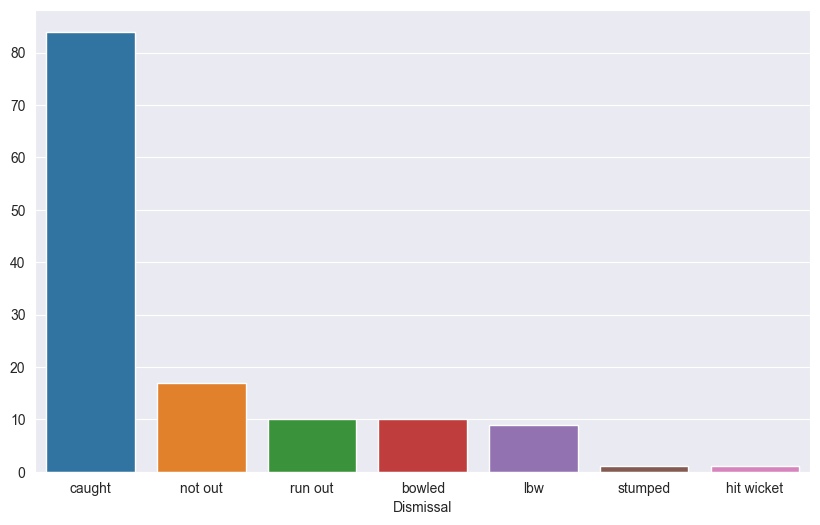

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x=dis.index,y=dis.values,hue=dis.index)
plt.show()

# Q-11] Find out against which team Virat Kohli scored most of his runs

In [18]:
new_op = df.groupby('Opposition')['Runs'].sum()
new_op

Opposition
v Australia        999
v Bangladesh       544
v England          830
v Ireland           34
v Netherlands       12
v New Zealand      877
v Pakistan          22
v South Africa     558
v Sri Lanka       1084
v West Indies     1009
v Zimbabwe         215
Name: Runs, dtype: int64

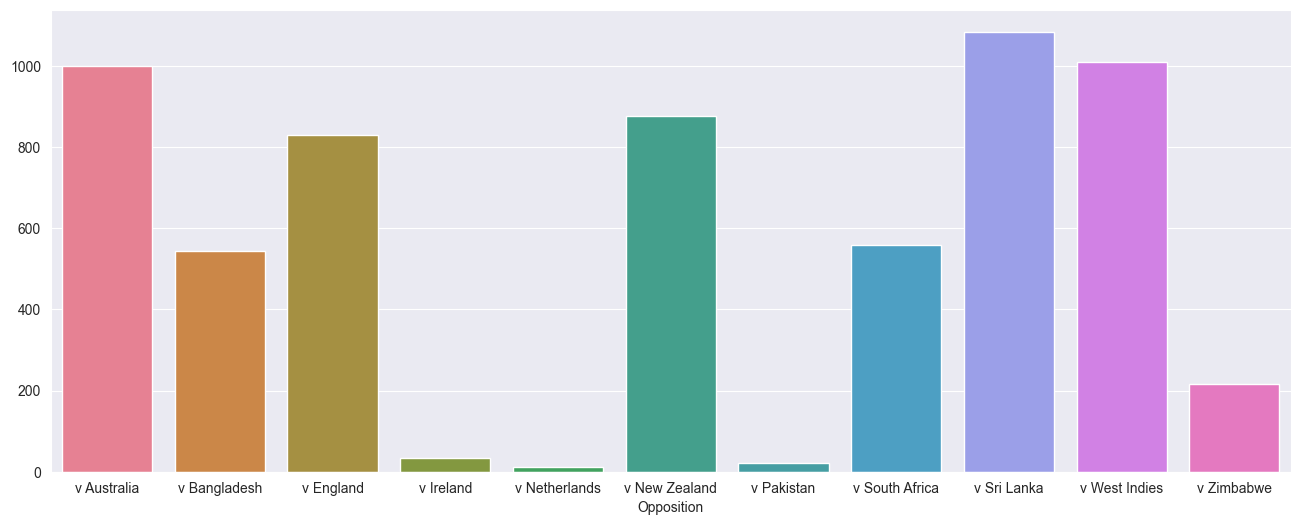

In [19]:
plt.figure(figsize=(16,6))
sns.barplot(x=new_op.index,y=new_op.values,hue=new_op.index)
plt.show()

In [20]:
print("Scored most of his runs : ",new_op.idxmax())

Scored most of his runs :  v Sri Lanka


# Q-12] Find out against which team Virat Kohli scored most of his centuries

In [21]:
new_op_cent = cent_df.groupby('Opposition')['Runs'].sum()
new_op_cent

Opposition
v Australia       556
v Bangladesh      338
v England         341
v New Zealand     382
v South Africa    138
v Sri Lanka       480
v West Indies     346
v Zimbabwe        115
Name: Runs, dtype: int64

In [22]:
cent_op = cent_df['Opposition'].value_counts()
cent_op

Opposition
v Australia       5
v Sri Lanka       4
v Bangladesh      3
v New Zealand     3
v England         3
v West Indies     3
v Zimbabwe        1
v South Africa    1
Name: count, dtype: int64

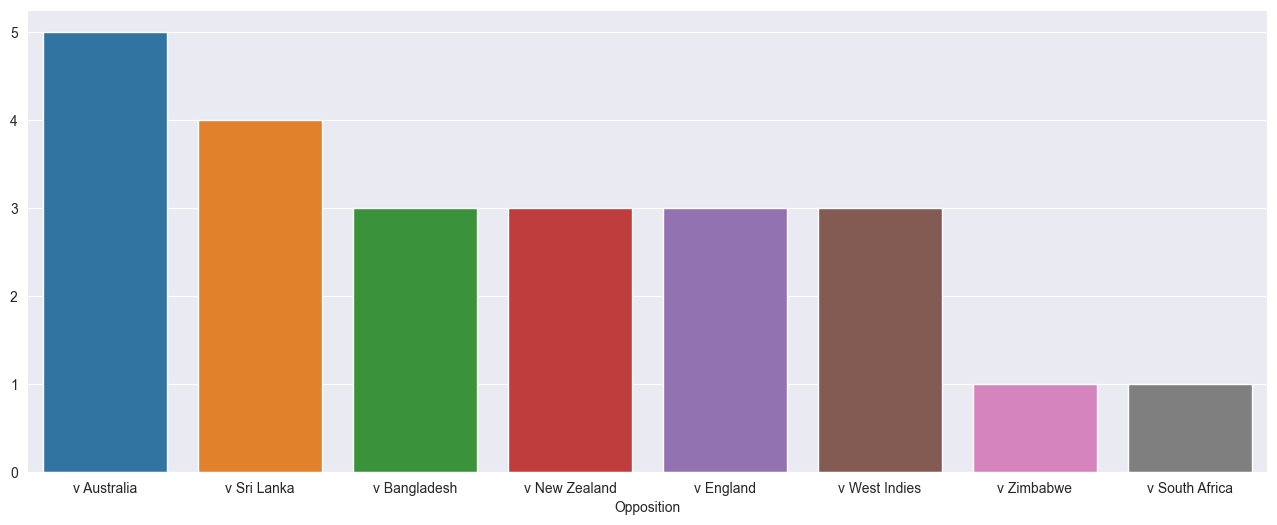

In [23]:
plt.figure(figsize=(16,6))
sns.barplot(x=cent_op.index,y=cent_op.values,hue=cent_op.index)
# sns.lineplot(x=cent_op.index,y=cent_op.values.mean(), color='black')
plt.show()

In [24]:
print('Scored most of his centuries againts : ',cent_op.idxmax())

Scored most of his centuries againts :  v Australia


# Q-13] let’s analyze Virat Kohli’s strike rate

In [25]:
df['SR'].describe()

count    132.000000
mean      76.991212
std       37.874491
min        0.000000
25%       61.702500
50%       78.710000
75%      100.000000
max      209.090000
Name: SR, dtype: float64

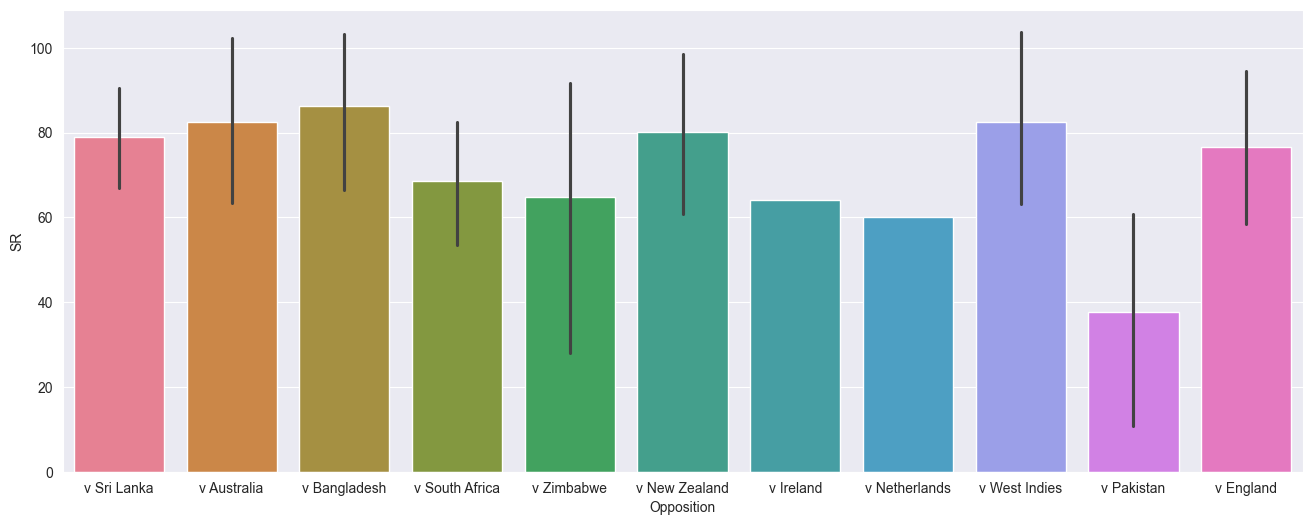

In [26]:
plt.figure(figsize=(16,6))
sns.barplot(x=df['Opposition'],y=df['SR'],hue=df['Opposition'])
plt.show()

In [27]:
print('In which match Strike rate is highest : ',df[df['SR'] == df['SR'].max()].iloc[0,8])
print('In which match Strike rate is lowest : ',df[df['SR'] == df['SR'].min()].iloc[0,8])


In which match Strike rate is highest :  v West Indies
In which match Strike rate is lowest :  v Zimbabwe


In [28]:
df['Opposition'].value_counts()

Opposition
v Sri Lanka       24
v England         21
v Australia       20
v West Indies     19
v South Africa    15
v New Zealand     14
v Bangladesh       8
v Zimbabwe         5
v Pakistan         4
v Ireland          1
v Netherlands      1
Name: count, dtype: int64

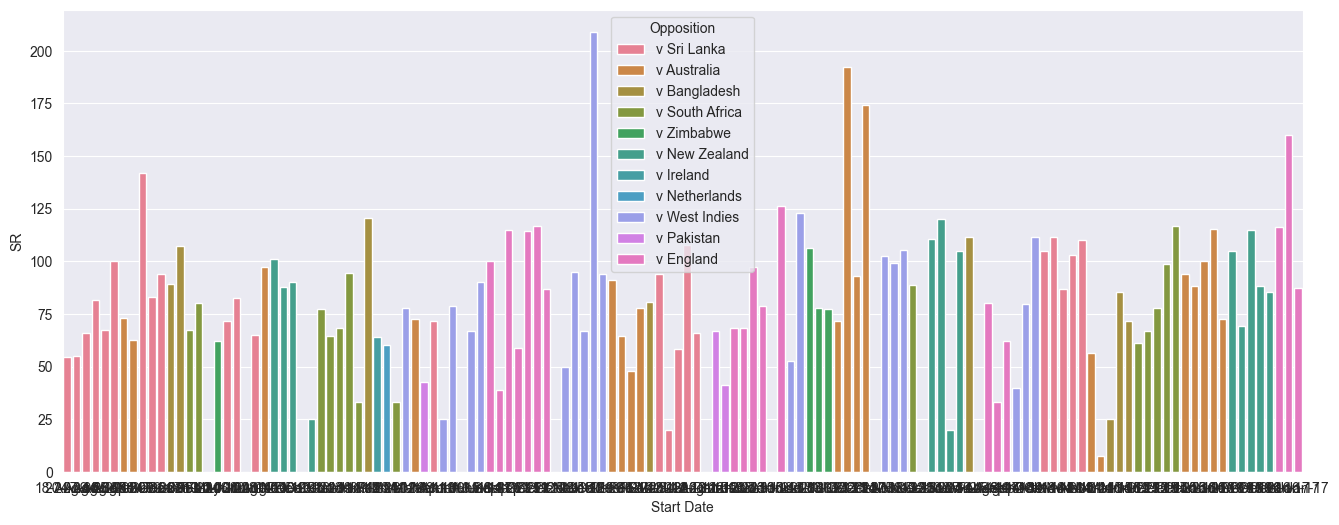

In [29]:
plt.figure(figsize=(16,6))
sns.barplot(x=df['Start Date'],y=df['SR'],hue=df['Opposition'])
plt.show()

# Q-14] Virat Kohli plays with high strike rates in the first innings or second innings

In [30]:
df.groupby('Inns')['SR'].max()

Inns
1    209.09
2    192.30
Name: SR, dtype: float64

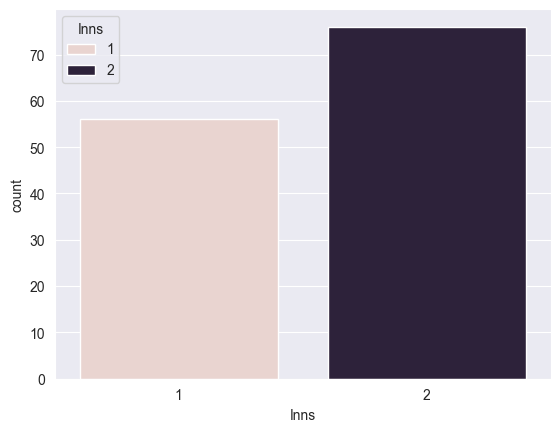

In [31]:
sns.countplot(x=df['Inns'],hue=df['Inns'])
plt.show()

# Q-15]  relationship between runs scored by Virat Kohli and fours played by him in each innings

<Axes: xlabel='Inns', ylabel='Runs'>

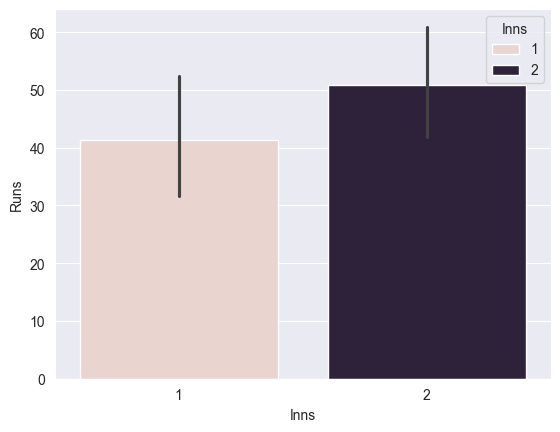

In [32]:
# fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# sns.scatterplot(ax=axes[0],x=df['Inns'],y=df['Runs'])
# sns.scatterplot(ax=axes[1],x=df['Inns'],y=df['Runs'])

sns.barplot(x=df['Inns'],y=df['Runs'],hue=df['Inns'])

# Q-16]  if there is some relationship with the sixes

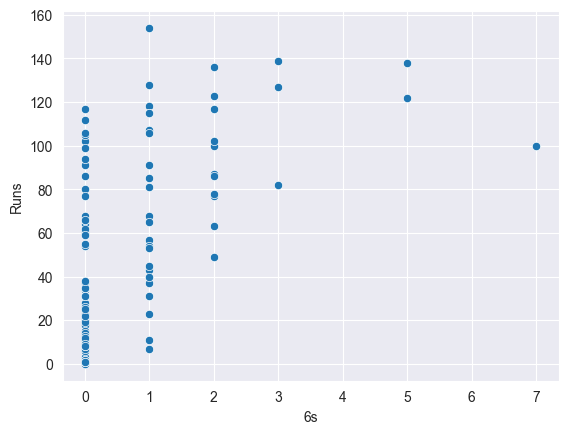

In [33]:
sns.scatterplot(x=df['6s'],y=df['Runs'])
plt.show()

In [34]:
df.head()

,Runs,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,22,1,0,54.54,2.0,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,67,6,0,55.22,2.0,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,38,4,0,65.78,1.0,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,66,7,0,81.81,1.0,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,46,3,1,67.39,1.0,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


In [35]:
df['Pos'].describe()

count    132.000000
mean       3.303030
std        0.873174
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Pos, dtype: float64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Runs        132 non-null    int64  
 1   BF          132 non-null    int64  
 2   4s          132 non-null    int64  
 3   6s          132 non-null    int64  
 4   SR          132 non-null    float64
 5   Pos         132 non-null    float64
 6   Dismissal   132 non-null    object 
 7   Inns        132 non-null    int64  
 8   Opposition  132 non-null    object 
 9   Ground      132 non-null    object 
 10  Start Date  132 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 11.5+ KB


In [37]:
d = df['Ground'].value_counts().index
d

Index(['Dhaka', 'Dambulla', 'Colombo (RPS)', 'Mohali', 'Kolkata', 'Chennai',
       'Delhi', 'Ahmedabad', 'Harare', 'Visakhapatnam', 'Nagpur',
       'Port of Spain', 'Dharamsala', 'Ranchi', 'Bengaluru', 'Rajkot', 'Kochi',
       'Cuttack', 'Sydney', 'Jaipur', 'Melbourne', 'Mumbai', 'Indore',
       'Kanpur', 'Brisbane', 'Hambantota', 'Cardiff', 'Hyderabad (Deccan)',
       'North Sound', 'Hamilton', 'Vadodara', 'Kingston', 'Pune',
       'Johannesburg', 'Durban', 'Birmingham', 'Napier', 'Wellington',
       'Fatullah', 'Nottingham', 'Leeds', 'Perth', 'Southampton', 'Pallekele',
       'Adelaide', 'The Oval', 'Centurion', 'Port Elizabeth', 'Cape Town',
       'Guwahati', 'Bulawayo', 'Canberra'],
      dtype='object', name='Ground')

In [38]:
df.columns

Index(['Runs', 'BF', '4s', '6s', 'SR', 'Pos', 'Dismissal', 'Inns',
       'Opposition', 'Ground', 'Start Date'],
      dtype='object')

In [39]:
df.sample(10)

,Runs,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
9,54,65,7,0,83.07,4.0,lbw,1,v Sri Lanka,Nagpur,18-Dec-09
51,86,99,11,0,86.86,4.0,not out,2,v England,Mumbai,23-Oct-11
100,13,21,2,0,61.90,3.0,caught,2,v England,Leeds,5-Sep-14
131,55,63,8,0,87.30,3.0,caught,2,v England,Kolkata,22-Jan-17
83,100,52,8,7,192.30,3.0,not out,2,v Australia,Jaipur,16-Oct-13
98,40,50,2,1,80.00,3.0,caught,2,v England,Nottingham,30-Aug-14
50,35,30,5,0,116.66,4.0,lbw,2,v England,Mohali,20-Oct-11
127,45,51,2,1,88.23,3.0,caught,2,v New Zealand,Ranchi,26-Oct-16
36,59,76,5,0,77.63,3.0,bowled,1,v West Indies,Chennai,20-Mar-11
10,107,114,11,1,93.85,4.0,caught,2,v Sri Lanka,Kolkata,24-Dec-09


In [40]:
# logical regression